# IMPORT MODULES

*Need to import some important Python libraries and methods that you will need to process financial data and perform data analysis.*

*Numpy is a Python library used for numerical computations using multidimensional arrays and complex mathematical functions.*

*The requests module enables you to easily download files from the web. It has a get method that takes a string of a URL to download.*

*The JavaScript Object Notation (JSON) module enables you to convert a string of JSON data into a Python dictionary via the loads method.*

*Pandas is a Python library that is built from the ground-up to do financial data analysis. It has a dataframe object that makes it easy to analyze tabular data traditionally done using spreadsheets.*

*Matplotlib is a Python library used for visualizing data. Pandas provides a wrapper to the library so you can plot nice charts with a single line of code.*

---



In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
import json

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# PROCESS DATA

*Step 1: Use the get method of the requests module to download data from Alphavantage's website. This returns data as a JSON string, their default data format. Import the JSON string into a dictionary using the loads method of the JSON module. List the keys of the dictionary using the keys method so that you can extract the relevant time series.*

---





In [2]:
response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo")
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

*Step 2: Extract the time series using the relevant key and put it in a pandas dataframe for easier processing and analysis of data. Review the dataframe object using the info method.*

---



In [3]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2020-05-18 to 2019-12-24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


*Step 3: Check the data by inspecting one of the columns in the dataframe. In the example below, you will get a key error if you try to extract data from any of the columns in the dataframe at this stage. The reason for the key error is that the column name is the string '4. close' and not 'close'. Create user-friendly column names using the column attribute*

---



In [4]:
stock['close']

KeyError: ignored

In [5]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [7]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

*Step 4: Continue inspecting the data. You will get an error when you try to plot the values in the dataframe because the values are strings and not numeric data. Convert string data in the dataframe into real numbers using astype(float) method*

---



In [8]:
stock['close'].plot(figsize=(20,5), title='Microsoft (MSFT) daily closing prices'), plt.show();

TypeError: ignored

In [9]:
type(stock['close'][1])

str

In [10]:
stock = stock.astype(float)
type(stock['close'][1])

numpy.float64

*Step 5: Convert pandas default dataframe index attribute into a datetime index attribute so that you have a standard time series*

---



In [11]:
stock.index = pd.to_datetime(stock.index)
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

*Step 6: Use the plot method to visualize your time series data.*

---



# VISUALIZE DATA

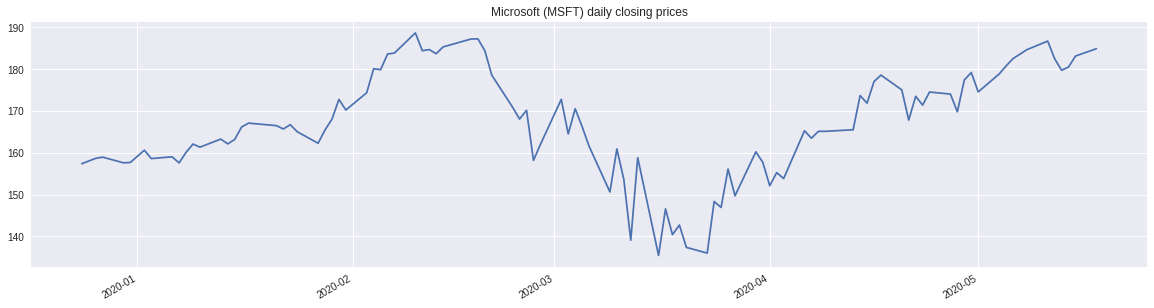

In [12]:
stock['close'].plot(figsize=(20,5), title='Microsoft (MSFT) daily closing prices'), plt.show();

*Step 7: Check the quality of your data by getting samples from your dataframe using the sample, head and tail methods*

---



# SUMMARIZE DATA

In [13]:
summary = stock.describe()
summary

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,167.004941,169.747871,164.381052,167.185600,4.547517e+07
std,12.996459,11.854852,13.376039,12.849183,2.155059e+07
min,137.010000,140.570000,132.520000,135.420000,8.989150e+06
25%,158.665000,160.697500,157.018750,158.927500,2.980397e+07
50%,167.410000,168.470000,164.860000,166.385000,3.927840e+07
75%,176.757500,179.250000,175.162500,178.592500,5.727420e+07
max,190.650000,190.700000,186.470000,188.700000,9.707356e+07


# SAMPLE DATA

In [14]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2020-01-06,157.08,159.100,156.510,159.03,20826702.0
2020-03-02,165.31,172.920,162.310,172.79,71030810.0
2020-04-08,165.67,166.670,163.500,165.13,48318234.0
2020-02-13,183.08,186.230,182.872,183.71,35295834.0
2020-05-12,186.90,187.040,182.300,182.51,32038199.0
2020-01-24,167.51,167.530,164.450,165.04,24918117.0
2020-02-14,183.25,185.410,182.650,185.35,23149516.0
2020-01-14,163.39,163.600,161.720,162.13,23500783.0
2020-04-20,176.63,178.750,174.990,175.06,36669595.0
2020-01-03,158.32,159.945,158.060,158.62,21121681.0


In [15]:
stock.head()

,open,high,low,close,volume
2020-05-18,185.75,186.20,183.96,184.91,35109247.0
2020-05-15,179.06,187.06,177.00,183.16,46610382.0
2020-05-14,177.54,180.69,175.68,180.53,41873911.0
2020-05-13,182.55,184.05,176.54,179.75,44711488.0
2020-05-12,186.90,187.04,182.30,182.51,32038199.0


In [16]:
stock.tail()

,open,high,low,close,volume
2019-12-31,156.7700,157.77,156.450,157.70,18393383.0
2019-12-30,158.9865,159.02,156.730,157.59,16356720.0
2019-12-27,159.4500,159.55,158.220,158.96,18414352.0
2019-12-26,157.5511,158.73,157.400,158.67,14526927.0
2019-12-24,157.4800,157.71,157.115,157.38,8989150.0


*Step 8: As you can see from the above sampling of data, the current time series is in descending order, with the most recent date at the top. However, many of the methods we will use to explore signals require the time series to be in ascending order. For instance, if you plot a moving average, it will be give you the wrong signal as seen below. Use the sort_index method to flip the time series upside down so that it is in ascending order. Recalculate the two moving averages.*

---



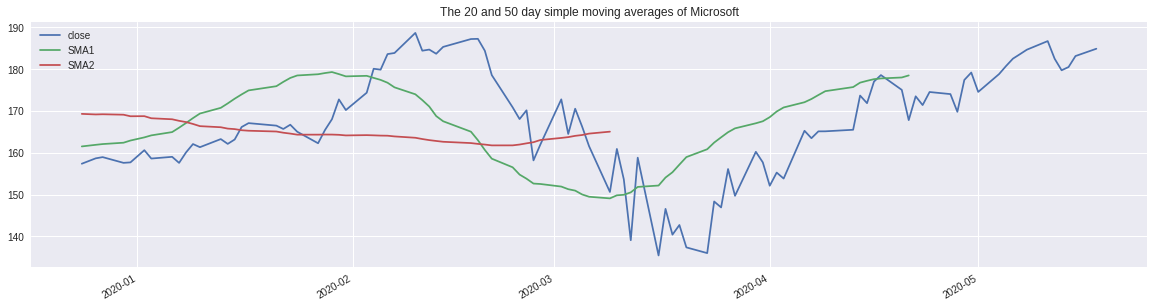

In [17]:
SMA1 = 20
SMA2 = 50
stock['SMA1'] = stock['close'].rolling(SMA1).mean()
stock['SMA2'] = stock['close'].rolling(SMA2).mean()
stock[['close','SMA1','SMA2']].plot(figsize=(20,5), grid = True, title='The 20 and 50 day simple moving averages of Microsoft'), plt.show();

In [18]:
stock = stock.sort_index(ascending = True)
stock.head()

,open,high,low,close,volume,SMA1,SMA2
2019-12-24,157.4800,157.71,157.115,157.38,8989150.0,161.5225,169.3128
2019-12-26,157.5511,158.73,157.400,158.67,14526927.0,161.9055,169.1776
2019-12-27,159.4500,159.55,158.220,158.96,18414352.0,162.0860,169.2226
2019-12-30,158.9865,159.02,156.730,157.59,16356720.0,162.4110,169.1160
2019-12-31,156.7700,157.77,156.450,157.70,18393383.0,162.9335,168.7454


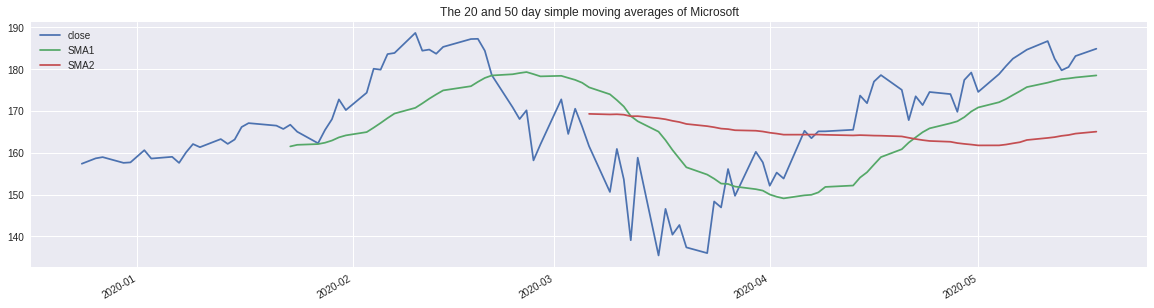

                open    high      low   close      volume  SMA1  SMA2
2019-12-24  157.4800  157.71  157.115  157.38   8989150.0   NaN   NaN
2019-12-26  157.5511  158.73  157.400  158.67  14526927.0   NaN   NaN
2019-12-27  159.4500  159.55  158.220  158.96  18414352.0   NaN   NaN
2019-12-30  158.9865  159.02  156.730  157.59  16356720.0   NaN   NaN
2019-12-31  156.7700  157.77  156.450  157.70  18393383.0   NaN   NaN


In [20]:
stock['SMA1'] = stock['close'].rolling(SMA1).mean()
stock['SMA2'] = stock['close'].rolling(SMA2).mean()
stock[['close','SMA1','SMA2']].plot(figsize=(20,5), grid = True, title='The 20 and 50 day simple moving averages of Microsoft'), plt.show();
print(stock.head())

*Step 9: Since you need a rolling window of 50 days to calculate a 50-day moving average, you will have 49 rows of NaN (Not a Number) values in the dataframe. You can get rid of the 19 NaN rows using the dropna method.*

---



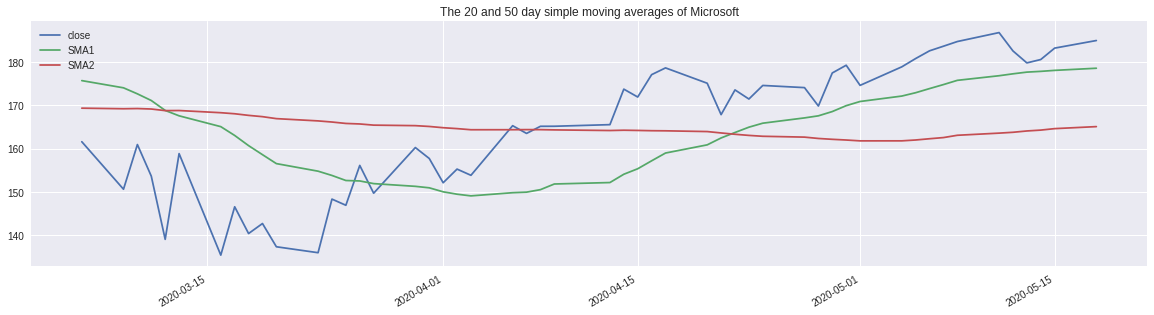

                open    high     low   close      volume      SMA1      SMA2
2020-03-06  162.6100  163.11  156.00  161.57  72821057.0  175.6665  169.3128
2020-03-09  151.0000  157.75  150.00  150.62  70419274.0  174.0030  169.1776
2020-03-10  158.1600  161.03  152.58  160.92  65354385.0  172.6140  169.2226
2020-03-11  157.1304  157.70  151.15  153.63  56504304.0  171.0735  169.1160
2020-03-12  145.3000  153.47  138.58  139.06  93226366.0  168.7910  168.7454


In [21]:
stock.dropna(inplace=True)
stock[['close','SMA1','SMA2']].plot(figsize=(20,5), grid = True, title='The 20 and 50 day simple moving averages of Microsoft'), plt.show();
print(stock.head())

*Step 10: Start analyzing your time series data to discover and evaluate trading signals.*

---



#ANALYZE SIGNALS

*In a dual moving average crossover signal, you compare a shorter term moving average, such as a 20 day simple moving average (SMA), with a longer term moving average, such as a 50 day SMA, to generate the dual moving average crossover signal. The signal is +1 when the 20-day SMA is above the the 50-day SMA and the signal is -1 when the opposite occurs.*

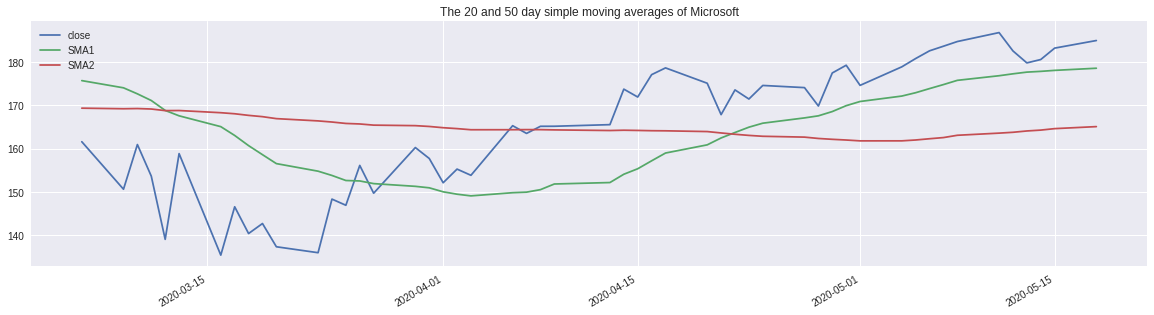

In [22]:
stock[['close','SMA1','SMA2']].plot(figsize=(20,5), grid = True, title='The 20 and 50 day simple moving averages of Microsoft'), plt.show();

*Create a new dataframe to capture the relevant data to analyze the dual moving average crossover signal. The 'change' column measures the absolute change in the closing prices of the stock. The 'crossover' column measures the absolute difference between the two moving averages at the end of each day. We use a numpy conditional statement to generate the dual moving average crossover signal.*

In [23]:
dualsma = pd.DataFrame()
dualsma['change'] = stock['close'].diff()
dualsma['crossover'] = stock['SMA1'] - stock['SMA2']
dualsma['signal']= np.where(dualsma['crossover'] > 0, 1, -1)
dualsma.sample(10)

,change,crossover,signal
2020-04-08,1.64,-13.8390,-1
2020-05-15,2.63,13.4359,1
2020-03-09,-10.95,4.8254,1
2020-05-12,-4.23,13.4821,1
2020-03-23,-1.37,-11.5955,-1
2020-04-16,5.16,-6.9439,-1
2020-03-11,-7.29,1.9575,1
2020-04-03,-1.43,-15.2528,-1
2020-05-04,4.27,10.3270,1
2020-05-14,0.78,13.5457,1


*Very often you will need to merge, concatenate or join two or more dataframes. In the example below, join the columns of the stock dataframe and the dualsma dataframe using the left join method.*

In [24]:
stock.join(dualsma, how='left').head()

,open,high,low,close,volume,SMA1,SMA2,change,crossover,signal
2020-03-06,162.6100,163.11,156.00,161.57,72821057.0,175.6665,169.3128,NaN,6.3537,1
2020-03-09,151.0000,157.75,150.00,150.62,70419274.0,174.0030,169.1776,-10.95,4.8254,1
2020-03-10,158.1600,161.03,152.58,160.92,65354385.0,172.6140,169.2226,10.30,3.3914,1
2020-03-11,157.1304,157.70,151.15,153.63,56504304.0,171.0735,169.1160,-7.29,1.9575,1
2020-03-12,145.3000,153.47,138.58,139.06,93226366.0,168.7910,168.7454,-14.57,0.0456,1
